In [91]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from scipy import stats

In [92]:
data = pd.read_csv("../Documents/Mmaster.csv.csv")

In [93]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,671,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,female,15-24 years,14,289700,483,Albania1987,NaN,"2,156,624,900",796,Generation X
2,Albania,1988,male,15-24 years,17,319200,533,Albania1988,NaN,"2,126,000,000",769,Generation X
3,Albania,1988,female,15-24 years,8,295600,271,Albania1988,NaN,"2,126,000,000",769,Generation X
4,Albania,1989,male,15-24 years,12,323500,371,Albania1989,NaN,"2,335,124,988",833,Generation X


In [94]:
data.isnull().any()
 


country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

In [95]:
data.isnull().values.any()

True

In [58]:
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [96]:
data=data.drop(['HDI for year'],axis=1)

In [60]:
data['suicides_no']
data = data.groupby('year').sum()
data['suicides_no']

year
1985    116063
1986    120670
1987    126842
1988    121026
1989    160244
1990    193361
1991    198020
1992    211473
1993    221565
1994    232063
1995    243544
1996    246725
1997    240745
1998    249591
1999    256119
2000    255832
2001    250652
2002    256095
2003    256079
2004    240861
2005    234375
2006    233361
2007    233408
2008    235447
2009    243487
2010    238702
2011    236484
2012    230160
2013    223199
2014    222984
2015    203640
2016     15603
Name: suicides_no, dtype: int64

In [61]:
data[['suicides_no','population','suicides/100k pop','gdp_per_capita ($)']].describe()

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,32.000000,3.200000e+01,3.200000e+01,3.200000e+01
mean,210888.125000,1.603817e+09,1.012240e+06,1.466328e+07
std,55287.550729,3.930311e+08,2.618420e+05,7.946581e+06
min,15603.000000,1.321019e+08,2.004470e+05,3.508548e+06
25%,202235.000000,1.520310e+09,9.373738e+05,8.091948e+06
50%,233384.500000,1.740078e+09,1.051207e+06,1.272938e+07
75%,243501.250000,1.845573e+09,1.216423e+06,2.220915e+07
max,256119.000000,1.997297e+09,1.331494e+06,2.693621e+07


Text(0.5, 0, 'Year')

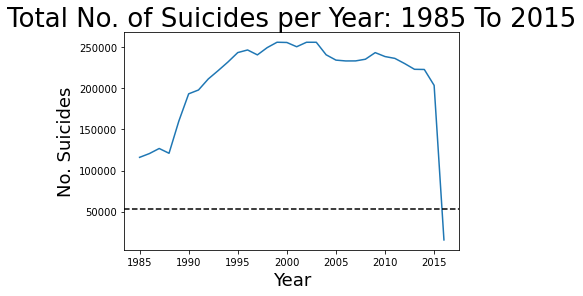

In [62]:
#Total suicides, with average line
data['suicides_no'].plot()
plt.title('Total No. of Suicides per Year: 1985 To 2015', fontsize = 26)
plt.axhline(y=52720, color='black', linestyle='--')
plt.ylabel('No. Suicides', fontsize = 18)
plt.xlabel('Year', fontsize = 18)          


In [64]:
asia = ['Armenia','Bahrain','Israel','Japan','Kazakhstan','Kuwait','Kyrgyzstan','Macau','Maldives','Oman','Philippines','Qatar','Republic of Korea',
      'Singapore', 'Sri Lanka','Thailand','Turkmenistan', 'United Arab Emirates' ,'Uzbekistan']
africa = ['Cabo Verde','Mauritius', 'Seychelles', 'South Africa']
europe = ['Albania','Austria','Azerbaijan','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia', 'Cyprus',
     'Czech Republic','Denmark','Estonia','France','Finland','Georgia','Germany', 'Greece','Hungary','Iceland', 'Ireland','Italy',
     'Latvia','Lithuania','Luxembourg','Malta', 'Montenegro', 'Netherlands','Norway', 'Poland', 'Portugal','Romania','Russian Federation',
     'San Marino', 'Serbia','Slovakia', 'Slovenia','Spain','Sweden', 'Switzerland','Turkey','Ukraine', 'United Kingdom' ]
northamerica = ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','El Salvador',
        'Grenada','Guatemala','Jamaica','Mexico','Nicaragua','Panama', 'Puerto Rico','Saint Kitts and Nevis','Saint Lucia', 'Saint Vincent and Grenadines',
         'United States']
southamerica = ['Argentina','Aruba','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Suriname','Trinidad and Tobago', 'Uruguay']
australiaoceania = ['Australia','Fiji','Kiribati','New Zealand']


In [65]:
print(f'Number of Asian in our dataset are : {len(asia)}')
print(f'Number of AustraliaOceania in our dataset are : {len(australiaoceania)}')
print(f'Number of NorthAmerican in our dataset are : {len(northamerica)}')
print(f'Number of SouthAmerican in our dataset are : {len(southamerica)}')
print(f'Number of European in our dataset are : {len(europe)}')
print(f'Number of Africa in our dataset are : {len(africa)}')
print(f'Total number of countries in our dataset are : {len(asia)+len(africa)+len(europe)+len(southamerica)+len(northamerica)+len(australiaoceania)}')

Number of Asian in our dataset are : 19
Number of AustraliaOceania in our dataset are : 4
Number of NorthAmerican in our dataset are : 20
Number of SouthAmerican in our dataset are : 11
Number of European in our dataset are : 42
Number of Africa in our dataset are : 4
Total number of countries in our dataset are : 100


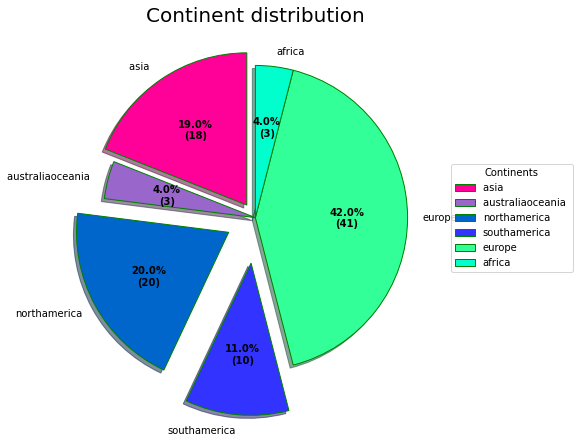

In [66]:
# Creating dataset
continents = ['asia ', 'australiaoceania ', 'northamerica', 'southamerica', 'europe', 'africa']
data = [19, 4, 20, 11, 42, 4]
  # Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)
# Creating color parameters
colors = ( "#FF0099", "#9966CC", "#0066CC","#3333FF", "#33FF99", "#00FFCC")
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,autopct = lambda pct: func(pct, data),
          explode = explode,labels = continents,shadow = True,colors = colors,startangle = 90,wedgeprops = wp,textprops = dict(color ="black"))
  
# Adding legend
ax.legend(wedges, continents,title ="Continents",loc ="center left",bbox_to_anchor =(1, 0, 0.5, 1))  
plt.setp(autotexts, size = 10, weight ="bold")
ax.set_title("Continent distribution",fontsize=20) 
# show plot
plt.show()